In [1]:
import utils
from idanalysis.analysis import Tools
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def get_field_amplitude(phase, dgv):
    config_keys = (phase, dgv)
    fmap_fname = Tools.get_fmap_fname(id_configs=utils.ID_CONFIGS, meas_data_path=utils.MEAS_DATA_PATH,
                        config_dict=utils.CONFIG_DICT, config_keys=config_keys)
    fmap = Tools.get_fmap(fmap_fname)
    idx_rx0 = np.argmin(np.abs(fmap.rx))

    idx_rz0 = np.argmin(np.abs(fmap.rz))
    idx_p = np.argmin(np.abs(fmap.rz - utils.ID_PERIOD))

    bx = np.array(fmap.bx)[0, idx_rx0, 2*idx_rz0-idx_p:idx_p]
    by = np.array(fmap.by)[0, idx_rx0, 2*idx_rz0-idx_p:idx_p]
    bz = np.array(fmap.bz)[0, idx_rx0, 2*idx_rz0-idx_p:idx_p]
    rz = fmap.rz[2*idx_rz0-idx_p:idx_p]

    bx_max = np.max(bx)
    by_max = np.max(by)
    bz_max = np.max(bz)

    return bx_max, by_max, bz_max


In [3]:
dgvs = utils.dgv
phases = utils.phases
phases += [-6.5625]
phases += [-19.6875]
phases += [6.5625]
print(phases)

field_amp = np.zeros((len(phases), len(dgvs), 3))

for i, phase in enumerate(phases):
    if phase != -6.5625 and phase != 6.5625 and phase != -19.6875:
        for j, dgv in enumerate(dgvs):
            bx, by, bz = get_field_amplitude(phase, dgv)
            field_amp[i, j, 0] = bx
            field_amp[i, j, 1] = by
            field_amp[i, j, 2] = bz
    else:
        print(phase)
        bx, by, bz = get_field_amplitude(phase, 0)
        field_amp[i, 0, 0] = bx
        field_amp[i, 0, 1] = by
        field_amp[i, 0, 2] = bz


[0, -13.125, 13.125, -26.25, -6.5625, -19.6875, 6.5625]
ID4862
ID4863
ID4864
ID4865
ID4866
ID4867
ID4868
ID4869
ID4870
ID4871
ID4877
ID4878
ID4879
ID4880
ID4881
ID4872
ID4873
ID4874
ID4875
ID4876
-6.5625
ID4882
-19.6875
ID4883
6.5625
ID4884


In [4]:
print(np.array(dgvs)/26.25)


[0.   0.25 0.5  0.75 1.  ]


In [5]:
print('{:.2f}'.format(field_amp[6, 0, 2]))
print('{:.2f}'.format(field_amp[4, 0, 2]))
print('{:.2f}'.format(field_amp[5, 0, 2]))


1.32
1.33
0.51


In [6]:
print('{:.2f}'.format(field_amp[0, 0, 2]))
print('{:.2f}'.format(field_amp[0, 1, 2]))
print('{:.2f}'.format(field_amp[0, 2, 2]))
print('{:.2f}'.format(field_amp[0, 3, 2]))
print('{:.2f}'.format(field_amp[0, 4, 2]))


1.44
1.32
0.99
0.51
0.02


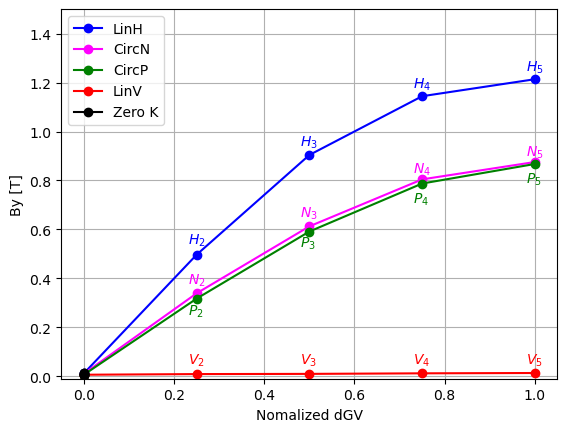

In [7]:
# plot by
fig, ax = plt.subplots(1)
ax.plot(np.array(dgvs)/26.25, field_amp[0, :, 1], 'o-', color='blue', label='LinH')
ax.plot(np.array(dgvs)/26.25, field_amp[1, :, 1], 'o-', color='magenta', label='CircN')
ax.plot(np.array(dgvs)/26.25, field_amp[2, :, 1], 'o-', color='green', label='CircP')
ax.plot(np.array(dgvs)/26.25, field_amp[3, :, 1], 'o-', color='red', label='LinV')
ax.plot(np.zeros(len(phases)), field_amp[:, 0, 1], 'o-', color='black', label='Zero K')
ax.grid()
ax.set_ylim(-0.01, 1.5)

ax.text(0.23, 0.54, r'$H_{2}$', color='blue', fontsize=10, fontstyle='oblique')
ax.text(0.48, 0.94, r'$H_{3}$', color='blue', fontsize=10, fontstyle='oblique')
ax.text(0.73, 1.18, r'$H_{4}$', color='blue', fontsize=10, fontstyle='oblique')
ax.text(0.98, 1.25, r'$H_{5}$', color='blue', fontsize=10, fontstyle='oblique')

ax.text(0.23, 0.38, r'$N_{2}$', color='magenta', fontsize=10, fontstyle='oblique')
ax.text(0.48, 0.65, r'$N_{3}$', color='magenta', fontsize=10, fontstyle='oblique')
ax.text(0.73, 0.83, r'$N_{4}$', color='magenta', fontsize=10, fontstyle='oblique')
ax.text(0.98, 0.90, r'$N_{5}$', color='magenta', fontsize=10, fontstyle='oblique')

ax.text(0.23, 0.38-0.13, r'$P_{2}$', color='green', fontsize=10, fontstyle='oblique')
ax.text(0.48, 0.65-0.12, r'$P_{3}$', color='green', fontsize=10, fontstyle='oblique')
ax.text(0.73, 0.83-0.12, r'$P_{4}$', color='green', fontsize=10, fontstyle='oblique')
ax.text(0.98, 0.90-0.11, r'$P_{5}$', color='green', fontsize=10, fontstyle='oblique')

ax.text(0.23, 0.05, r'$V_{2}$', color='red', fontsize=10, fontstyle='oblique')
ax.text(0.48, 0.05, r'$V_{3}$', color='red', fontsize=10, fontstyle='oblique')
ax.text(0.73, 0.05, r'$V_{4}$', color='red', fontsize=10, fontstyle='oblique')
ax.text(0.98, 0.05, r'$V_{5}$', color='red', fontsize=10, fontstyle='oblique')


ax.set_xlabel('Nomalized dGV')
ax.set_ylabel('By [T]')
ax.legend()

plt.savefig('by_vs_dgv.png')


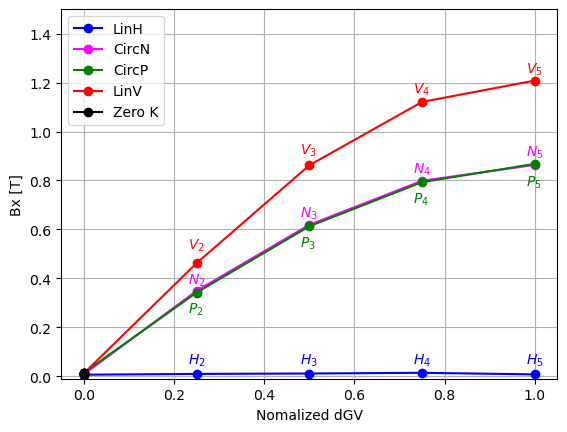

In [8]:
# plot bx
fig, ax = plt.subplots(1)
ax.plot(np.array(dgvs)/26.25, field_amp[0, :, 0], 'o-', color='blue', label='LinH')
ax.plot(np.array(dgvs)/26.25, field_amp[1, :, 0], 'o-', color='magenta', label='CircN')
ax.plot(np.array(dgvs)/26.25, field_amp[2, :, 0], 'o-', color='green', label='CircP')
ax.plot(np.array(dgvs)/26.25, field_amp[3, :, 0], 'o-', color='red', label='LinV')
ax.plot(np.zeros(len(phases)), field_amp[:, 0, 0], 'o-', color='black', label='Zero K')
ax.grid()
ax.set_xlabel('Nomalized dGV')
ax.set_ylabel('Bx [T]')
ax.set_ylim(-0.01, 1.5)

ax.text(0.23, 0.52, r'$V_{2}$', color='red', fontsize=10, fontstyle='oblique')
ax.text(0.48, 0.91, r'$V_{3}$', color='red', fontsize=10, fontstyle='oblique')
ax.text(0.73, 1.16, r'$V_{4}$', color='red', fontsize=10, fontstyle='oblique')
ax.text(0.98, 1.24, r'$V_{5}$', color='red', fontsize=10, fontstyle='oblique')

ax.text(0.23, 0.38, r'$N_{2}$', color='magenta', fontsize=10, fontstyle='oblique')
ax.text(0.48, 0.65, r'$N_{3}$', color='magenta', fontsize=10, fontstyle='oblique')
ax.text(0.73, 0.83, r'$N_{4}$', color='magenta', fontsize=10, fontstyle='oblique')
ax.text(0.98, 0.90, r'$N_{5}$', color='magenta', fontsize=10, fontstyle='oblique')

ax.text(0.23, 0.38-0.12, r'$P_{2}$', color='green', fontsize=10, fontstyle='oblique')
ax.text(0.48, 0.65-0.12, r'$P_{3}$', color='green', fontsize=10, fontstyle='oblique')
ax.text(0.73, 0.83-0.12, r'$P_{4}$', color='green', fontsize=10, fontstyle='oblique')
ax.text(0.98, 0.90-0.12, r'$P_{5}$', color='green', fontsize=10, fontstyle='oblique')

ax.text(0.23, 0.05, r'$H_{2}$', color='blue', fontsize=10, fontstyle='oblique')
ax.text(0.48, 0.05, r'$H_{3}$', color='blue', fontsize=10, fontstyle='oblique')
ax.text(0.73, 0.05, r'$H_{4}$', color='blue', fontsize=10, fontstyle='oblique')
ax.text(0.98, 0.05, r'$H_{5}$', color='blue', fontsize=10, fontstyle='oblique')


ax.legend()

plt.savefig('bx_vs_dgv.png')


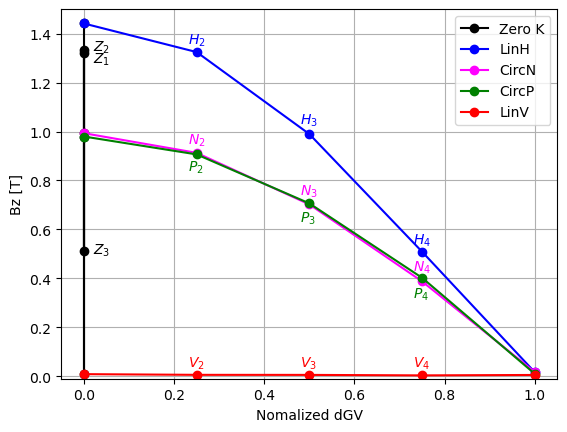

In [9]:
# plot bz
fig, ax = plt.subplots(1)

ax.plot(np.zeros(len(phases)), field_amp[:, 0, 2], 'o-', color='black', label='Zero K')

ax.plot(np.array(dgvs)/26.25, field_amp[0, :, 2], 'o-', color='blue', label='LinH')
ax.plot(np.array(dgvs)/26.25, field_amp[1, :, 2], 'o-', color='magenta', label='CircN')
ax.plot(np.array(dgvs)/26.25, field_amp[2, :, 2], 'o-', color='green', label='CircP')
ax.plot(np.array(dgvs)/26.25, field_amp[3, :, 2], 'o-', color='red', label='LinV')

ax.grid()
ax.set_ylim(-0.01, 1.5)

ax.text(0.23, 1.36, r'$H_{2}$', color='blue', fontsize=10, fontstyle='oblique')
ax.text(0.48, 1.03, r'$H_{3}$', color='blue', fontsize=10, fontstyle='oblique')
ax.text(0.73, 0.54, r'$H_{4}$', color='blue', fontsize=10, fontstyle='oblique')

ax.text(0.23, 0.95, r'$N_{2}$', color='magenta', fontsize=10, fontstyle='oblique')
ax.text(0.48, 0.74, r'$N_{3}$', color='magenta', fontsize=10, fontstyle='oblique')
ax.text(0.73, 0.43, r'$N_{4}$', color='magenta', fontsize=10, fontstyle='oblique')


ax.text(0.23, 0.95-0.11, r'$P_{2}$', color='green', fontsize=10, fontstyle='oblique')
ax.text(0.48, 0.74-0.11, r'$P_{3}$', color='green', fontsize=10, fontstyle='oblique')
ax.text(0.73, 0.43-0.11, r'$P_{4}$', color='green', fontsize=10, fontstyle='oblique')


ax.text(0.23, 0.04, r'$V_{2}$', color='red', fontsize=10, fontstyle='oblique')
ax.text(0.48, 0.04, r'$V_{3}$', color='red', fontsize=10, fontstyle='oblique')
ax.text(0.73, 0.04, r'$V_{4}$', color='red', fontsize=10, fontstyle='oblique')

ax.text(0.02, 1.33, r'$Z_{2}$', color='black', fontsize=10, fontstyle='oblique')
ax.text(0.02, 1.28, r'$Z_{1}$', color='black', fontsize=10, fontstyle='oblique')
ax.text(0.02, 0.5, r'$Z_{3}$', color='black', fontsize=10, fontstyle='oblique')

ax.set_xlabel('Nomalized dGV')
ax.set_ylabel('Bz [T]')
ax.legend()

plt.savefig('bz_vs_dgv.png')


In [44]:
def get_field_amplitude(phase, dgv):
    config_keys = (phase, dgv)
    fmap_fname = Tools.get_fmap_fname(id_configs=utils.ID_CONFIGS, meas_data_path=utils.MEAS_DATA_PATH,
                        config_dict=utils.CONFIG_DICT, config_keys=config_keys)
    fmap = Tools.get_fmap(fmap_fname)
    idx_rx0 = np.argmin(np.abs(fmap.rx))

    idx_rz0 = np.argmin(np.abs(fmap.rz))
    idx_p = np.argmin(np.abs(fmap.rz - utils.ID_PERIOD))

    bx = np.array(fmap.bx)[0, idx_rx0, 2*idx_rz0-idx_p:idx_p]
    by = np.array(fmap.by)[0, idx_rx0, 2*idx_rz0-idx_p:idx_p]
    bz = np.array(fmap.bz)[0, idx_rx0, 2*idx_rz0-idx_p:idx_p]
    rz = fmap.rz[2*idx_rz0-idx_p:idx_p]

    b_max = np.max(np.sqrt(bx**2+by**2))
    plt.plot(np.sqrt(bx**2+by**2))

    return b_max


ID4862
ID4863
ID4864
ID4865
ID4866
ID4867
ID4868
ID4869
ID4870
ID4871
ID4877
ID4878
ID4879
ID4880
ID4881
ID4872
ID4873
ID4874
ID4875
ID4876


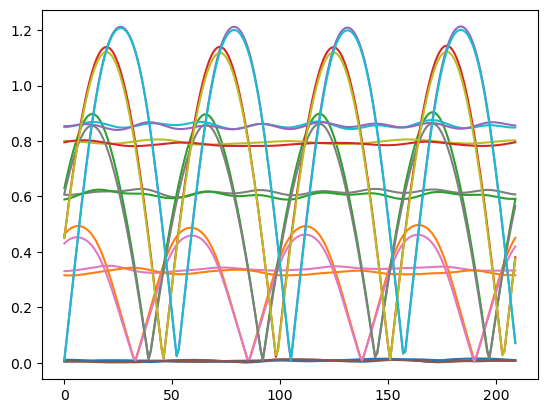

In [52]:
phases = [0, -13.125, 13.125, -26.25]
dgvs = [0, 6.5625, 13.125, 19.6875, 26.25]
field_amp = np.zeros((len(phases), len(dgvs)))
for i, phase in enumerate(phases):
    for j, dgv in enumerate(dgvs):
        field_amp[i, j] = get_field_amplitude(phase, dgv)


In [57]:
phases = [0, -13.125, 13.125, -26.25]
dgvs_interp = np.linspace(0, 26.25, 1000)

b_max = 0.71
for i, phase in enumerate(phases):
    b = field_amp[i, :]
    b_interp = np.interp(dgvs_interp, dgvs, b)
    idx_max = np.argmin(np.abs(b_interp-b_max))
    print('phase: ', phase, 'dgv max: ', dgvs_interp[idx_max])


phase:  0 dgv max:  9.984984984984985
phase:  -13.125 dgv max:  16.15990990990991
phase:  13.125 dgv max:  16.265015015015017
phase:  -26.25 dgv max:  10.615615615615615


In [58]:
def exponential(x, a, lamb, ):
    return -a*np.exp(-lamb*x) + a


In [ ]:
k = np.linspace(0, 1, 100)
y = exponential(k, 1.10)


[1.49613556 1.78633306]
9.46


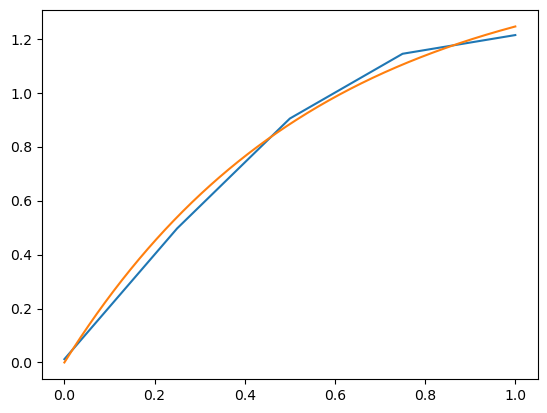

[1.10940087 1.63217095]
16.42


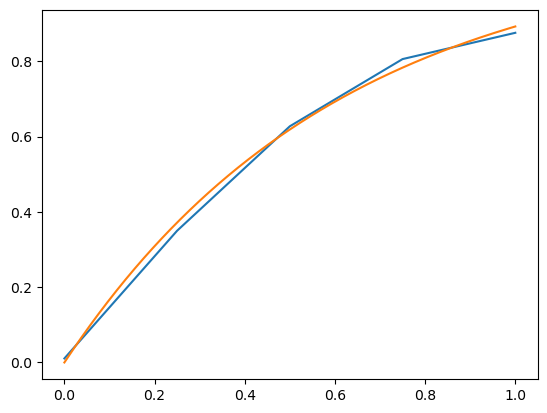

[1.10634649 1.61868334]
16.66


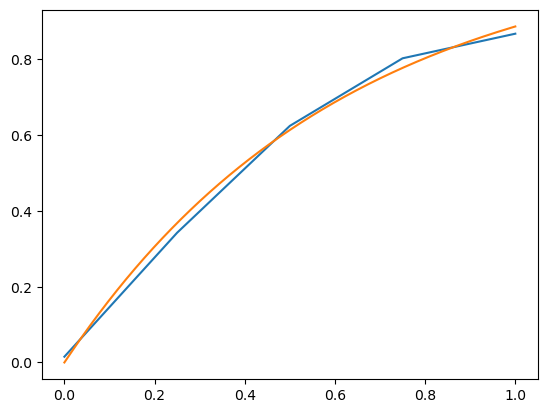

[1.57669898 1.54102205]
10.20


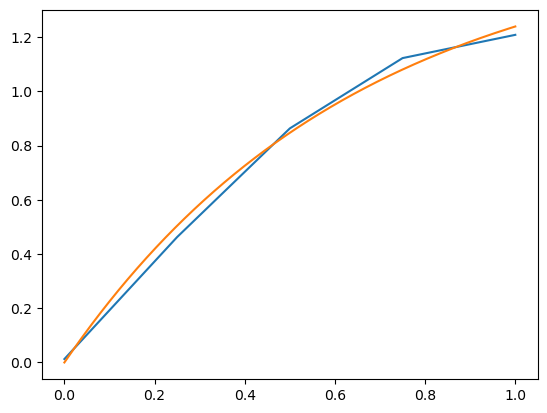

In [59]:
from scipy.optimize import curve_fit


knorm_interp = np.linspace(0, 1, 1000)
knorm = np.array(dgvs)/26.25
b_max = 0.71
for i, phase in enumerate(phases):
    b = field_amp[i, :]
    popt = curve_fit(exponential, np.array(dgvs)/26.25, b)
    print(popt[0])
    b_fit = exponential(knorm_interp, *popt[0])
    idx_max = np.argmin(np.abs(b_fit-b_max))
    print('{:.2f}'.format(knorm_interp[idx_max]*26.25))
    plt.plot(np.array(dgvs)/26.25, b)
    plt.plot(knorm_interp, b_fit)
    plt.show()
